In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
file_path = "../employee_attrition.csv"
df = pd.read_csv(file_path)

In [21]:
# df.Attrition.value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["#1f77b4", "#ff7f0e"], startangle=90)
# plt.title("Employee Attrition Percentage")
# plt.ylabel("")  # Hide the y-label for pie chart    
# plt.tight_layout()
# output_dir = "output"
# os.makedirs(output_dir, exist_ok=True)

In [22]:
# df_attrition = df[df['Attrition']=='Yes']
# df_attrition['JobRole'].value_counts().plot(kind="bar", color=sns.color_palette("Set2"))
# plt.title("Attrition by Job Role")
# plt.xlabel("Job Role")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.tight_layout()



In [23]:
# unique_jobs = df['JobRole'].unique().tolist()
# print(unique_jobs)

In [24]:
# job_role_counts = df['JobRole'].value_counts()
# attrition_percent = (df_attrition['JobRole'].value_counts() / job_role_counts * 100).reindex(unique_jobs)
# attrition_percent.plot(kind="bar", color=sns.color_palette("Set2"))
# plt.title("Attrition Percentage by Job Role")
# plt.xlabel("Job Role")
# plt.ylabel("Attrition Percentage (%)")
# plt.xticks(rotation=45)
# plt.tight_layout()

In [4]:
print(df.head())

   EmployeeID  Age  Gender Department    JobRole  EducationLevel  \
0        2001   57  Female      Sales  Executive               5   
1        2002   24    Male         IT    Manager               2   
2        2003   25    Male         IT  Executive               3   
3        2004   52    Male        R&D   Engineer               5   
4        2005   23  Female         HR  Executive               3   

   PerformanceRating  JobSatisfaction  EnvironmentSatisfaction  \
0                  4                3                        1   
1                  4                2                        2   
2                  2                2                        1   
3                  3                2                        3   
4                  3                4                        4   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  TrainingTimesLastYear  \
0                3               5                   7                      1   
1                4              

In [3]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df = pd.read_csv(file_path)
df_encoded = df.copy()
df_encoded['Attrition'] = encoder.fit_transform(df_encoded[['Attrition']])
df_encoded['JobRole'] = encoder.fit_transform(df_encoded[['JobRole']])
df_encoded['Department'] = encoder.fit_transform(df_encoded[['Department']])
df_encoded['OverTime'] = encoder.fit_transform(df_encoded[['OverTime']])
df_encoded['Gender'] = encoder.fit_transform(df_encoded[['Gender']])
def binMonthlyIncome(x):
    if x < 3000:
        return 0
    elif 3000 <= x < 5000:
        return 1  
    elif 5000 <= x < 7000:
        return 2  
    elif 7000 <= x < 10000:
        return 3  
    elif 10000 <= x < 15000:
        return 4
    elif 15000 <= x < 20000: 
        return 5
    else:
        return 6

df_encoded['MonthlyIncome'] = df_encoded['MonthlyIncome'].apply(binMonthlyIncome)     
df_encoded['MonthlyIncome'].value_counts()

def binAge(x):
    if x < 25:
        return 0
    elif 25 <= x < 30:
        return 1
    elif 30 <= x < 35:
        return 2      
    elif 35 <= x < 40:
        return 3
    elif 40 <= x < 45:
        return 4
    elif 45 <= x < 50:
        return 5
    elif 50 <= x < 55:
        return 6
    else:
        return 7
    
df_encoded['Age'] = df_encoded['Age'].apply(binAge)
df_encoded['Age'].value_counts()
df_encoded['good_salary'] = df_encoded.groupby(['Department','JobRole'])['MonthlyIncome'].transform(lambda x: 1 if x > x.mean() else 0)
    
    
    



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [48]:
df.columns

Index(['EmployeeID', 'Age', 'Gender', 'Department', 'JobRole',
       'EducationLevel', 'PerformanceRating', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'TrainingTimesLastYear', 'OverTime',
       'MonthlyIncome', 'DistanceFromHome', 'Attrition'],
      dtype='object')

In [51]:
X = df_encoded.drop(['Attrition','EmployeeID'], axis=1)
y = df_encoded['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y) 
importances = model.feature_importances_
feature_names = X.columns   



C:\Users\Eabhi\AppData\Local\Temp\ipykernel_18300\1100725803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


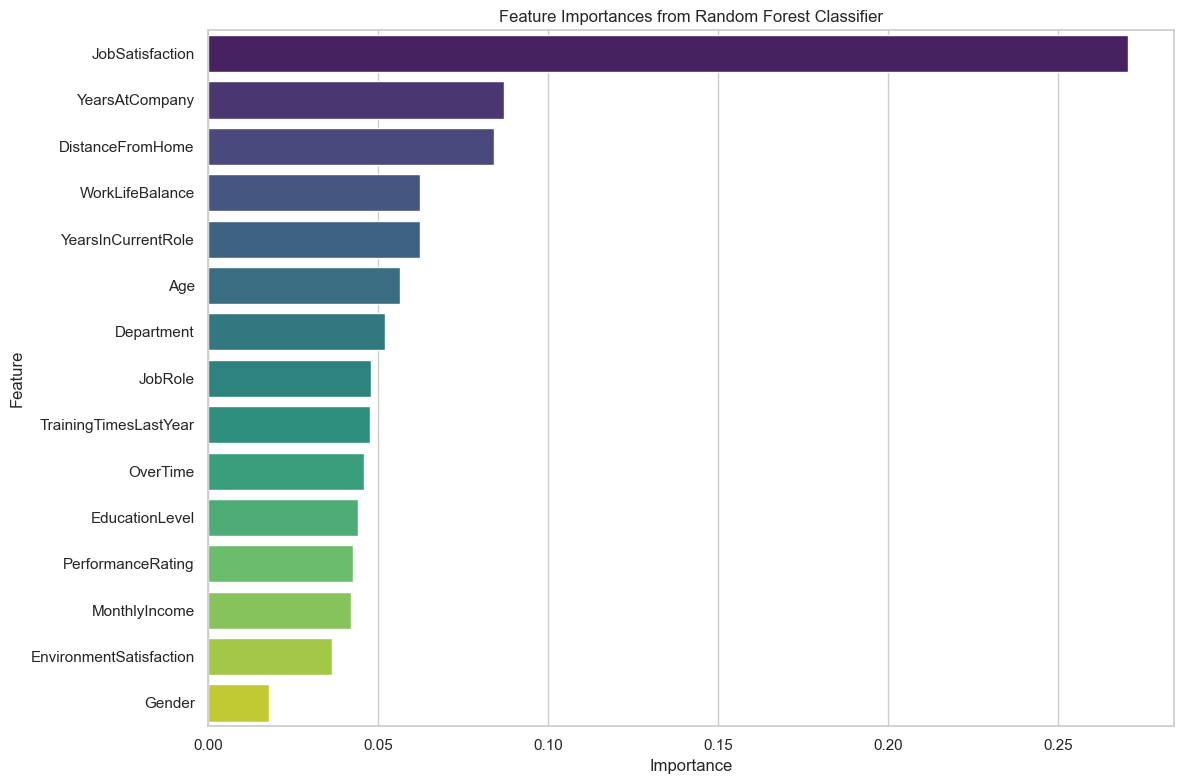

In [54]:
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

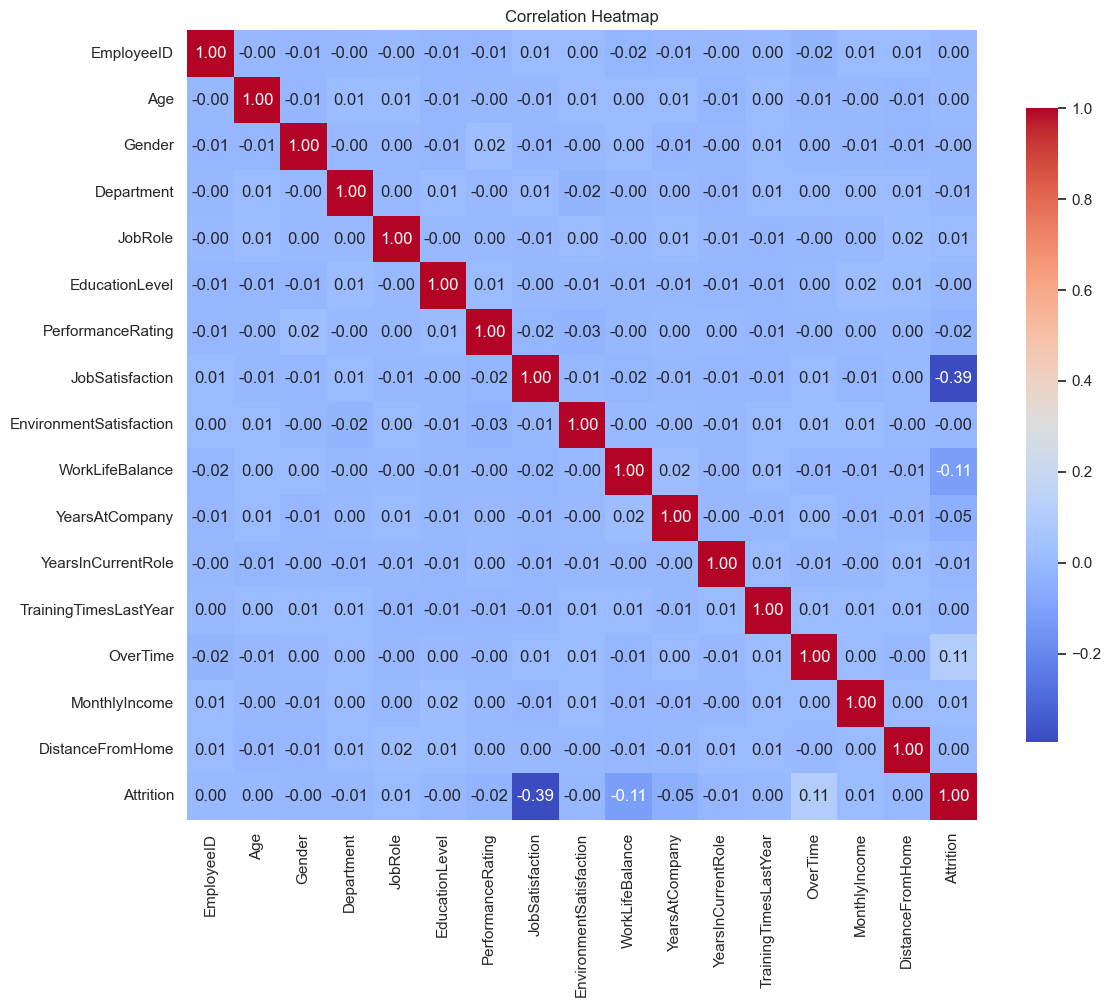

In [34]:
corr = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.tight_layout()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X = df_encoded.drop(columns=['Attrition'])
y = df_encoded['Attrition']
chi2_scores = chi2(X, y)
chi2_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores[0],
    'p-value': chi2_scores[1]
}).sort_values(by='Chi2 Score', ascending=False)
chi2_scores_df['p-value'] = chi2_scores_df['p-value'].apply(lambda x: f"{x:.4f}")
print(chi2_scores_df)


# 14            MonthlyIncome  1999.188938  0.0000
# 7           JobSatisfaction   774.102886  0.0000
# 10           YearsAtCompany    86.281148  0.0000
# 13                 OverTime    81.839204  0.0000
# 9           WorkLifeBalance    62.301666  0.0000

                    Feature   Chi2 Score p-value
14            MonthlyIncome  1999.188938  0.0000
7           JobSatisfaction   774.102886  0.0000
10           YearsAtCompany    86.281148  0.0000
13                 OverTime    81.839204  0.0000
9           WorkLifeBalance    62.301666  0.0000
0                EmployeeID    38.892482  0.0000
11       YearsInCurrentRole     2.359446  0.1245
6         PerformanceRating     1.570818  0.2101
3                Department     0.600394  0.4384
4                   JobRole     0.395934  0.5292
15         DistanceFromHome     0.200453  0.6544
5            EducationLevel     0.070554  0.7905
1                       Age     0.049785  0.8234
12    TrainingTimesLastYear     0.023309  0.8787
2                    Gender     0.021919  0.8823
8   EnvironmentSatisfaction     0.020824  0.8853


C:\Users\Eabhi\AppData\Local\Temp\ipykernel_18300\193989559.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='MonthlyIncome', x='Attrition', data=df, palette='viridis')


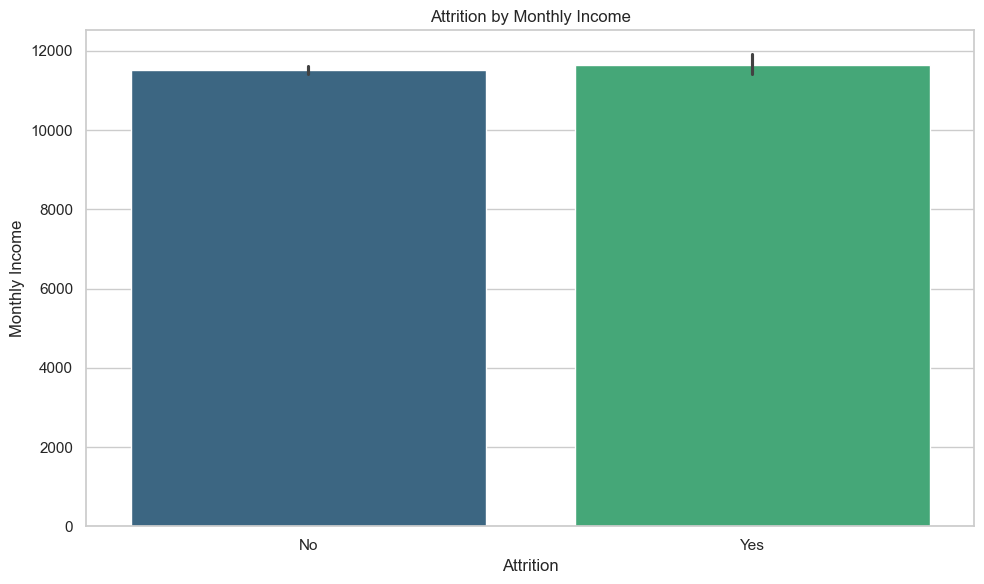

In [60]:
sns.barplot(y='MonthlyIncome', x='Attrition', data=df, palette='viridis')
plt.title('Attrition by Monthly Income')
plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.tight_layout()

In [ ]:

# sns.countplot(x='good_salary', hue='Attrition', data=df, palette='viridis')
# plt.title('Attrition by Good Salary')
# plt.xlabel('Good Salary')
# plt.ylabel('Count')
# plt.legend(title='Attrition', loc='upper right')
# plt.tight_layout()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [8]:
pd.crosstab(df['good_salary'], df['Attrition'])

Attrition,No,Yes
good_salary,,
False,4166,795
True,4219,820


In [55]:
# df_attrition['PerformanceRating'].value_counts().sort_index().plot(kind="bar", color=sns.color_palette("Set2"))
# plt.title("Attrition by Performance Rating")
# plt.xlabel("Performance Rating")
# plt.ylabel("Count")
# plt.xticks(rotation=0)
# plt.tight_layout()
# # plt.title("Attrition by Department")
# # sns.scatterplot(data=df_attrition, x='Department', y='JobRole', hue='Age',  sizes=(20, 200), alpha=0.6, palette='viridis')

In [9]:
df.head()

,EmployeeID,Age,Gender,Department,JobRole,EducationLevel,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,TrainingTimesLastYear,OverTime,MonthlyIncome,DistanceFromHome,Attrition,good_salary
0,2001,57,Female,Sales,Executive,5,4,3,1,3,5,7,1,Yes,7112,20,No,False
1,2002,24,Male,IT,Manager,2,4,2,2,4,8,1,0,Yes,5104,23,No,False
2,2003,25,Male,IT,Executive,3,2,2,1,1,0,2,5,No,7073,4,No,False
3,2004,52,Male,R&D,Engineer,5,3,2,3,1,14,7,3,No,8430,27,No,False
4,2005,23,Female,HR,Executive,3,3,4,4,3,0,1,4,Yes,17323,24,No,True


In [10]:
pd.crosstab(df['OverTime'], df['Attrition'])

Attrition,No,Yes
OverTime,,
No,6068,952
Yes,2317,663


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)   

NameError: name 'X_train' is not defined

In [ ]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [15]:
df.head()

,EmployeeID,Age,Gender,Department,JobRole,EducationLevel,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,TrainingTimesLastYear,OverTime,MonthlyIncome,DistanceFromHome,Attrition,good_salary
0,2001,57,Female,Sales,Executive,5,4,3,1,3,5,7,1,Yes,7112,20,No,False
1,2002,24,Male,IT,Manager,2,4,2,2,4,8,1,0,Yes,5104,23,No,False
2,2003,25,Male,IT,Executive,3,2,2,1,1,0,2,5,No,7073,4,No,False
3,2004,52,Male,R&D,Engineer,5,3,2,3,1,14,7,3,No,8430,27,No,False
4,2005,23,Female,HR,Executive,3,3,4,4,3,0,1,4,Yes,17323,24,No,True
